Let's reproduce GPT-2 (124M)

revoir reprocude GPT2 !
10$ pour le refaire dans le cloud !! (1h), c'est vraiment quasi rien

Lire papier gpt3 >> gpt2

Va revoir hugging face

GELU, mélange entre RELU mais plus 'smooth' en 0 (avant, approximé avec tanh mais aujourd'hui ça sert à rien (c'était pour l'optimisation mais aujourd'hui c'est bon))
Et si j'utilise une fonction qui varie ? Genre au début avec de forte avairion en 0 puis de plus en plus lisse (tu vois ?)

Utilise un mask pour être sûr de ne pas tricher à prédir le futur avec la connaissance du futur dans l'entrainement

28min

Il met en place le calcul sur un cpu, puis sur ses gpu ...

utiliser optimiser Adamw et pas Adam (selon lui c'est juste moins buguer), avec optimizer = torch.optim.Adamw(...)
lr = 3e-4, un classique il parait

1h

Il recommande lambdalabs, à voir pls (ia en cloud), connecte vcs avec lambdalabs
Faire attention entre des float64 et float32? pas besoin d'une énorme précision en ML, float32 suffit
Même 32 c'est bcp en fait, float16, int8 marche aussi
with sparcity ? c'est quoi ?
int8 utiliser pour l'inférence (utilisation du modèle)
Inférence = utilisation ... (tout ça c'esst 1h27 environ, vrm sympa)

Flops = nombre de calcul en virgule flotant par seconde

Regarde et fait un algo de multiplication de matrice, comment c'est fait en vrai bordel

Le gros du travail d'un transformer dans les calcul de matrice 'Linear' ...

Est-ce pertinent d'utiliser une méthode d'approximation pour le calcul matriciel dans le cadre de ML ?

TF32 c'est un Float 32, mais couopé sur la mantisse, il à la forme exacte d'un FP16 ..., utiliser je pens epour des calcul plus rapide au début puis augme nter la précision

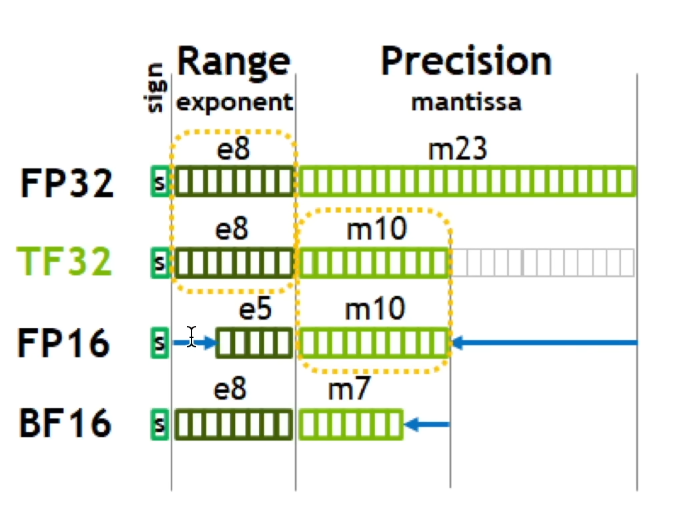

--- GitHub : Automatic Mixed Precision --- Pour éviter de se prendr ela tête avec l'évolution des float32, 16, FB, FP...
Just use torch.autocast

torch.compile : permet de compiler le python  (fin pour les nn, pas otut le python) !! (genre 300ms -> 130ms)
Toujours utiliser torch.compile (sauf deboguage genre)

HBM = High Bandwidth Memory (mémoir du GPU ?)

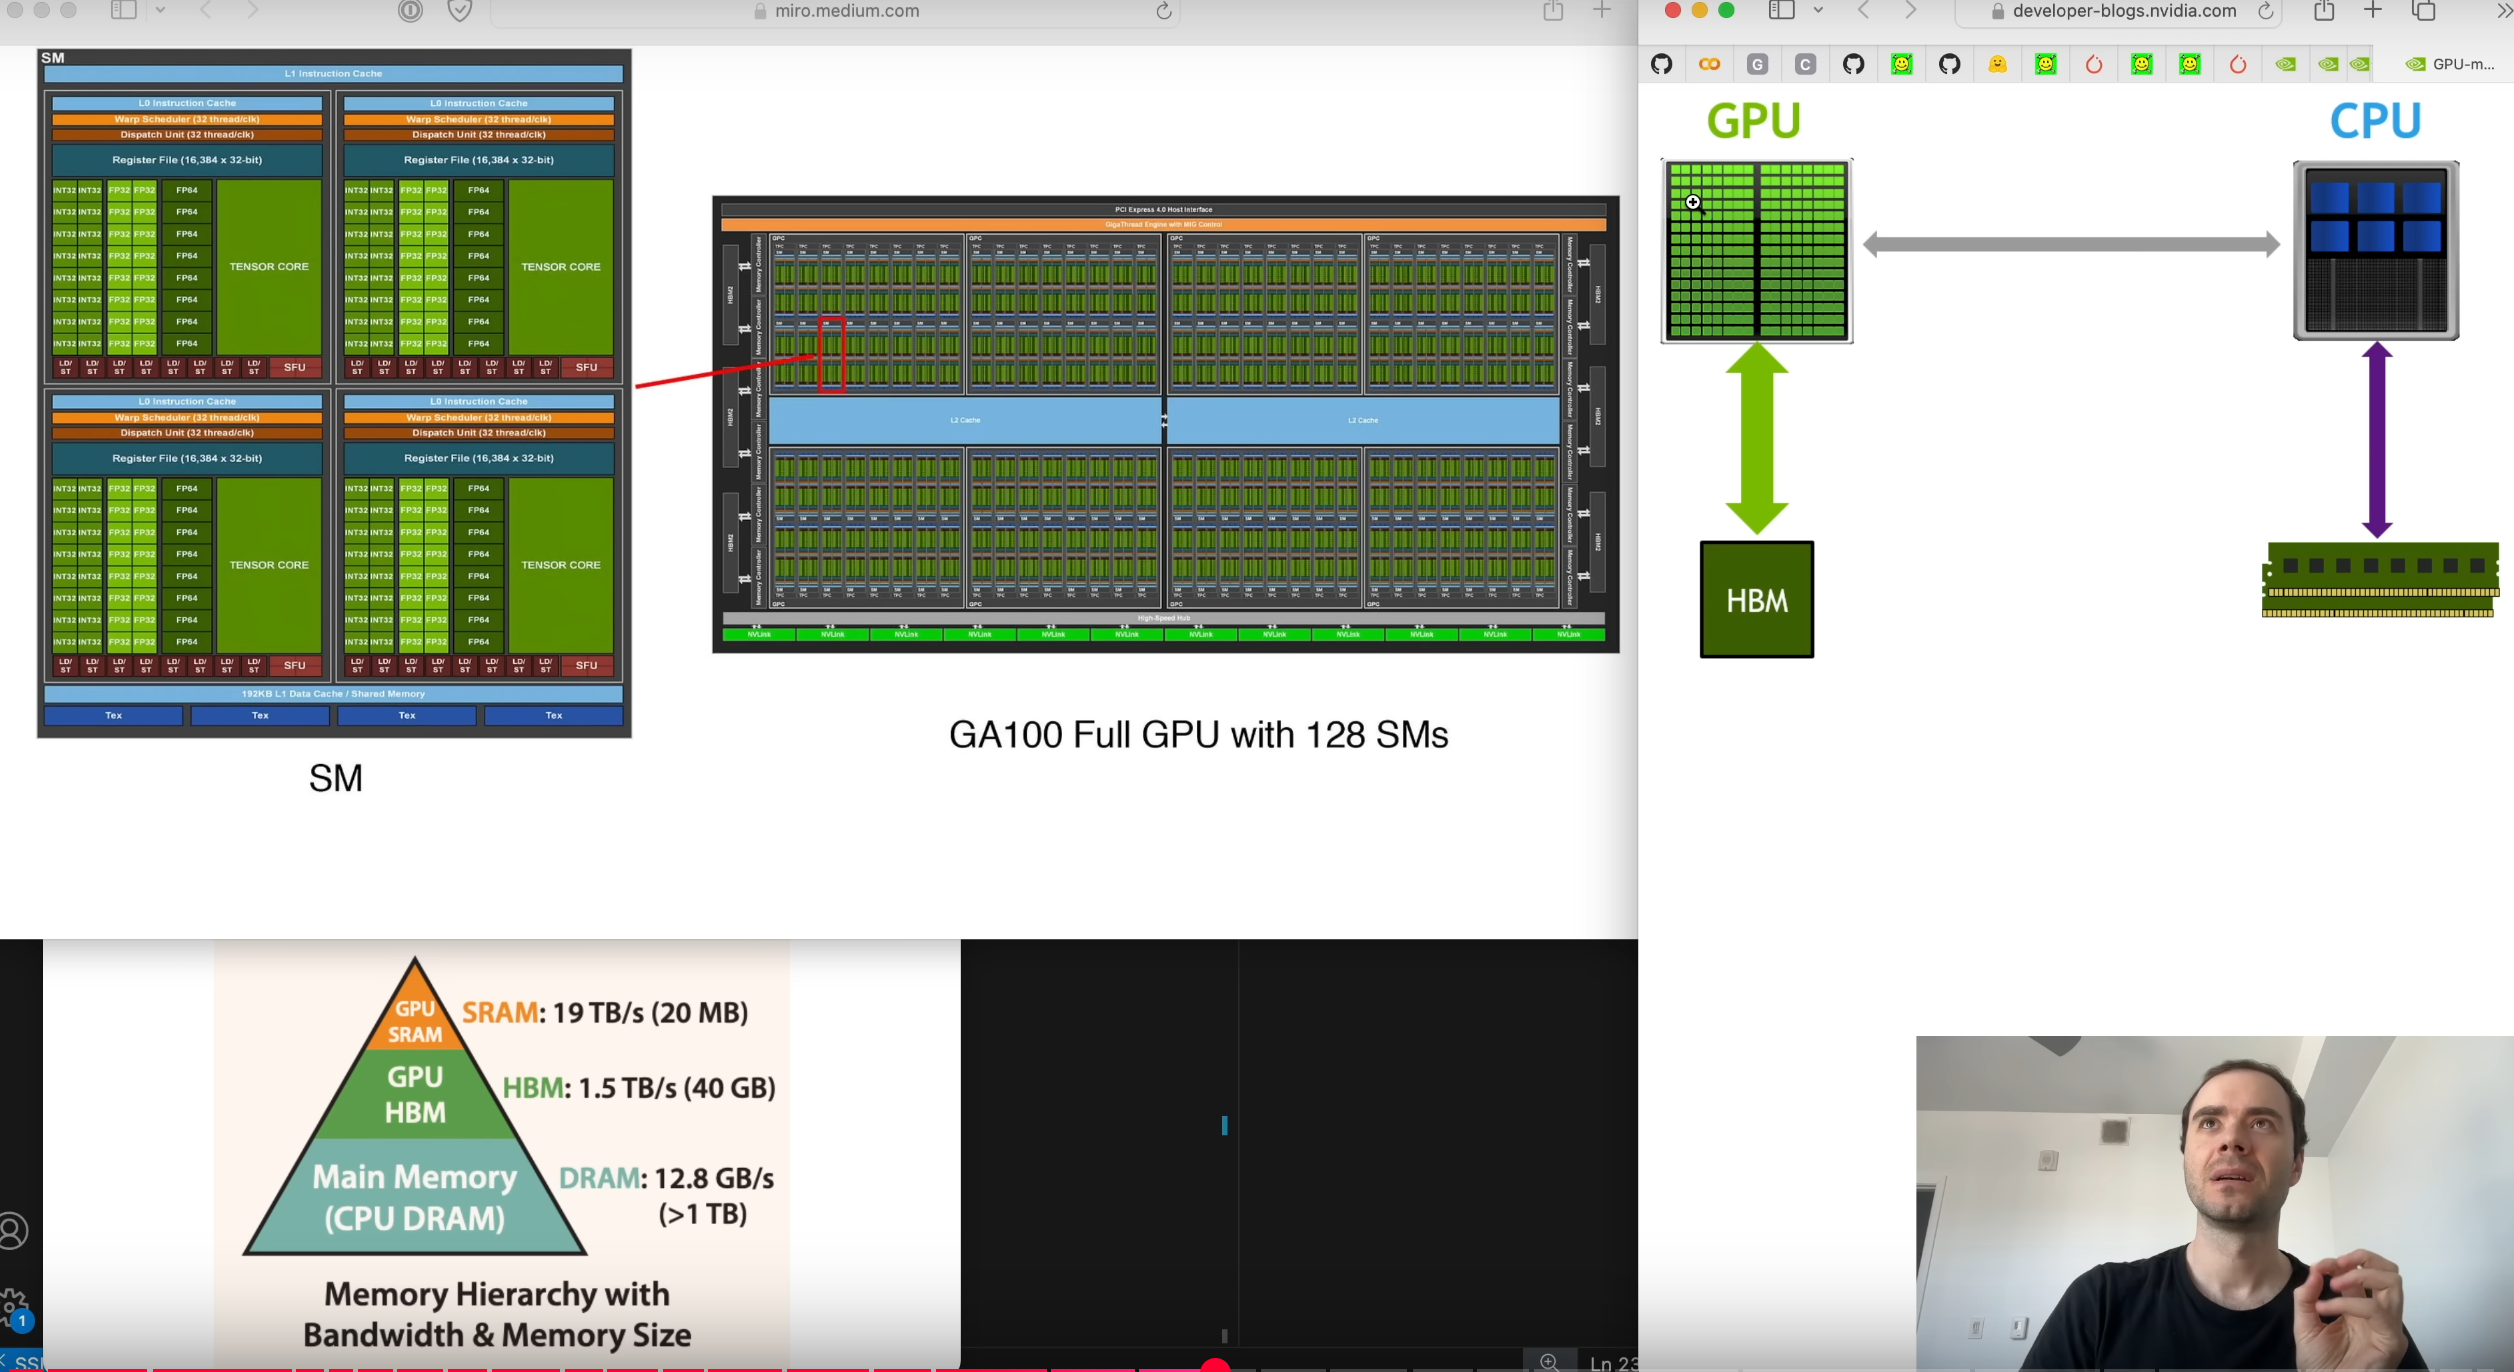

SRAM > HBM > DRAM

2h

flash attention, lire l'article (algorithme pour mécanisme d'attention performant), passe de 130ms = 100    ms
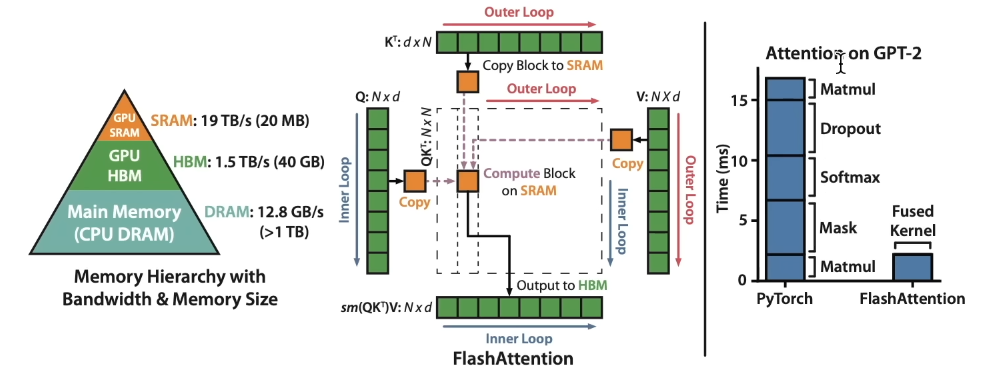
Petit trick sur le softmax, pas besoin de tout utiliser ? (Pas compris mais c'est stylé) (Article : Online normalizer calculation for sotfmax)

Les 2**n sont très utiliser dans les kernel, construit dessus d'où es raison d'utiliser des po(2,m) pour des nn

Augmenter le nombre de token genre pour avoir un truc plus 'joli' (en 2**n) permet d'être plus rapide mais consomme plus d'opération ..., tu gagne qqu % gratuitement

article : gpt2 donne weights mais pas les détailles et vice-versa pour gpt3

gpt3 : dans la descente de grad, normalisation des norm des grand % à la norme total (sqrt(x0²+x1²+...)) (c'est du 'cliping')

grad_accumulator, lorsque ton gpu est trop petit pour le batch_size, 2h37

2h46 (fin gradient accum)

DDP : Distribute Data Parrallel, faire parler plusieurs GPU en même temps (pytorhch aussi) (clancer avec torch.run et pas python directement, )

SlimPajama : un data set accessible sur internet pour train ton modèle
FineWeb dataset, pareil c'est sympa aussi (Hugging face publie FineWeb-Edu aussi), caractère 'educational' jugé par un autre llm

HellaSwag benchmark, un truc de 2019 sur la complession de phrase/scènette, avantage:marche aussi pour les mini llm (comme c'est des choix de suite et pas génération) (3h35, pour le choix il regarde la propabilité de la proposition, puis choisir la plus haute entre les 4)

Affiche le loss de validation, il est bien plus 'smooth' que le loss de training ...

Allez voir ERRATA dans le github de nanogpt (post-vidéos)

Dans les data d'entrainement, il faut les mélanger (en particulier pour FineWeb-Edu ... cf vidéo 3h50)

Il reste plein d'étape ! Fine-tunning, ...

Language CUDA, regarde bordel !, il à refait llm.c (pareil mais en C/CUDA? plus ramide à exécution et compilation)










Remarque quoi mettre dans README.md ... ?? (config ?)



